### Documentation Link:- https://docs.google.com/document/d/1dGQzrYEZm2O2_Jvc-ncinVPuu6FJBJihQw9veqEz3VU/edit?usp=sharing

### AIM:-
- In this project we get to know how the Price of a Mobile Phone changes depending on the specifications of the Mobile like Wifi, Bluetooth, Ram, Battery Capacity etc..

- With the help of this project we can know what is the Relation between the features and the selling rate of a particular Mobile Phone

- In this project we are mainly going to use two algorithms
 - Logistic Regression
 - KNN 


### Data Collection
- We are using Dataset from Downloaded from the Internet
- The features of the Mobiles are
 - Battery Power
 - Bluetooth
 - Clock Speed
 - Dual Sim
 - Front Camera pixel
 - 4G
 - Internal Memory
 - Mobile Depth
 - Mobile Weight
 - Number of Cores in Processor
 - Rear Camera pixel
 - Pixel height
 - Pixel Width
 - Ram
 - Screen Height
 - Screen Width
 - Talk Time:- For how many hour a full charge battery can last while you are talking on Phone
 - 3G
 - Touch Screen
 - Wifi
 - Price Range
 
 
 


In [1]:
# importing the requried packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing Dataset
data=pd.read_csv('mobile.csv')

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [5]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Data Visualization & Analysis

#### 1. How does Ram effect Price

Text(336.9714285714286, 0.5, 'Ram')

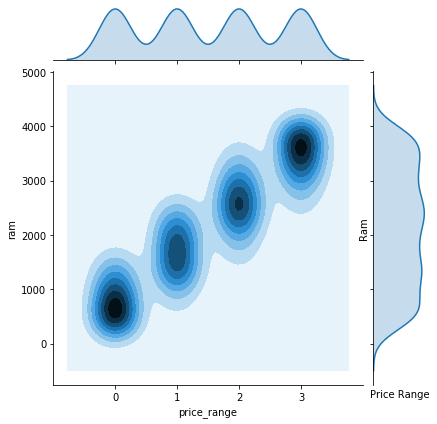

In [6]:
sns.jointplot(x='price_range',y='ram',data=data,kind='kde')
plt.xlabel('Price Range')
plt.ylabel('Ram')

#### 2. How does Battery power effect Price

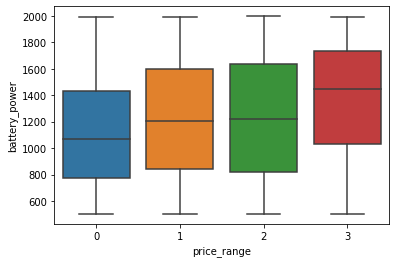

In [7]:
sns.boxplot(x='price_range',y='battery_power',data=data)

#### 3. How Does Internal Memory effect Price

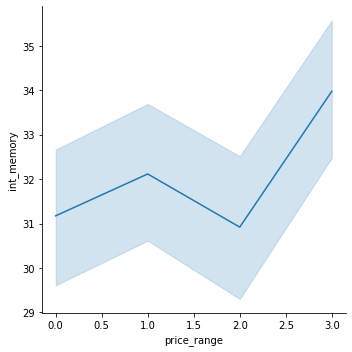

In [8]:
sns.relplot(x='price_range',y='int_memory',data=data,kind="line")

#### 4. Percentage of Phones Supporting 4G

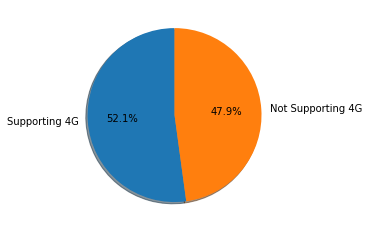

In [9]:
LABELS = ['Supporting 4G','Not Supporting 4G']
data_4G = data['four_g'].value_counts().values
figure, ax1 = plt.subplots()
ax1.pie(data_4G, labels=LABELS,shadow=True,startangle=90,autopct='%1.1f%%')
plt.show()

#### 5. Percentage of Phones Supporting 3G

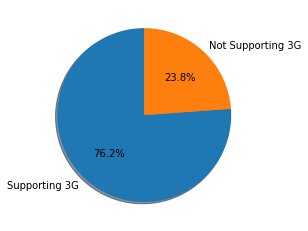

In [10]:
LABELS= ['Supporting 3G','Not Supporting 3G']
data_3G=data['three_g'].value_counts().values
figure, ax1 = plt.subplots()
ax1.pie(data_3G, labels=LABELS,shadow=True,startangle=90, autopct='%1.1f%%')
plt.show()

#### 6. Number of Phones Which has a Touch Screen

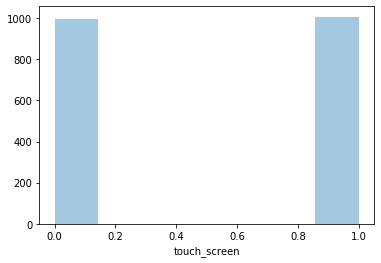

In [11]:
sns.distplot(data['touch_screen'],kde=False)

#### 7. Front Camera megapixels and Reatr Camera megapixels Comparision

Text(0.5, 0, 'Mega Pixel')

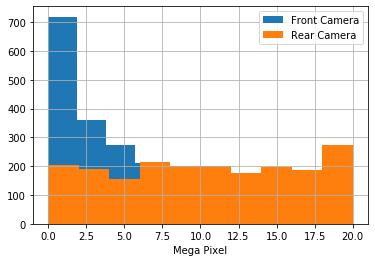

In [12]:
data['fc'].hist(label='Front Camera')
data['pc'].hist(label='Rear Camera')
plt.legend()
plt.xlabel('Mega Pixel')

#### Checking Whether the dataset has any Missing Values 

In [13]:
data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

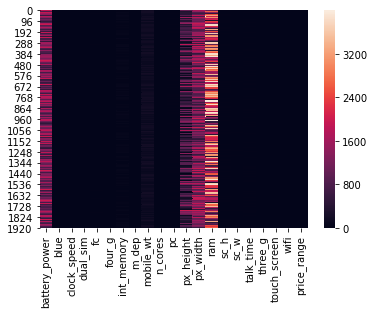

In [14]:
sns.heatmap(data)

### Preparing the Data
- Input Data as X
 - All the Columns except Price Range
- Ouput Data as Y
 - Price Range 

In [15]:
X=data.drop('price_range',axis=1)
X.shape

(2000, 20)

In [16]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [17]:
y=data['price_range']
y.shape

(2000,)

In [18]:
print(y)

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64


### Spiliting the Data into Test Data and Train data to Train and Test the Model 

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1400, 20)
(600, 20)
(1400,)
(600,)


### Creating and Training Logistic  Regression Model

In [22]:
from sklearn.tree import DecisionTreeClassifier
regression_model = DecisionTreeClassifier()

In [23]:
regression_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Testing the Model With Train Data

In [24]:
y_train_pred=regression_model.predict(X_train)

In [25]:
y_train_pred=y_train_pred.round()

In [26]:
y_train_pred==y_train

1194    True
45      True
1477    True
1293    True
1736    True
        ... 
1791    True
1096    True
1932    True
235     True
1061    True
Name: price_range, Length: 1400, dtype: bool

In [27]:
lis=list(y_train==y_train_pred)

In [28]:
count=0
for i in lis:
    if i==True:
        count+=1
print(count)        

1400


In [29]:
# Confusion matrix for training data
# Confusion matrix(Actual Values, Predicted values)
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_train, y_train_pred)
conf

array([[365,   0,   0,   0],
       [  0, 351,   0,   0],
       [  0,   0, 332,   0],
       [  0,   0,   0, 352]], dtype=int64)

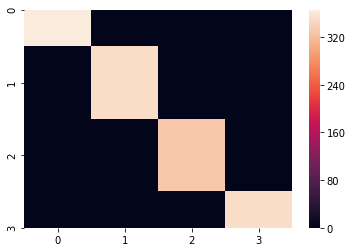

In [30]:
sns.heatmap(conf)

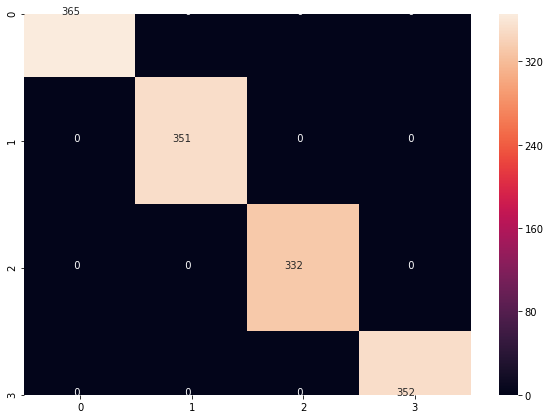

In [31]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

1.0

### Testing the Model With Test Data

In [33]:
y_test_pred=regression_model.predict(X_test)

In [34]:
y_test_pred

array([0, 1, 1, 0, 2, 1, 1, 3, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 1, 3, 3,
       1, 2, 3, 2, 2, 3, 1, 2, 1, 1, 2, 0, 3, 3, 0, 0, 0, 1, 2, 1, 3, 1,
       0, 1, 2, 2, 1, 2, 2, 2, 1, 3, 1, 3, 1, 3, 3, 1, 0, 2, 1, 3, 2, 1,
       0, 2, 3, 2, 1, 2, 0, 3, 3, 1, 2, 1, 1, 0, 0, 3, 1, 2, 3, 2, 2, 0,
       1, 1, 3, 0, 1, 1, 1, 3, 3, 0, 3, 3, 3, 3, 1, 1, 2, 0, 0, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 2, 2, 1, 0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 2,
       0, 3, 2, 0, 3, 2, 1, 1, 0, 0, 3, 1, 0, 2, 0, 1, 0, 1, 3, 3, 1, 1,
       0, 1, 1, 1, 3, 1, 3, 1, 3, 2, 3, 1, 2, 1, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 1, 2, 0, 3, 1, 0, 2, 3, 3, 1, 2, 1, 2, 2, 2, 3, 0, 1, 2, 3,
       3, 1, 3, 2, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 2, 0, 3, 0, 1, 0, 3, 1,
       0, 2, 2, 1, 3, 3, 1, 3, 1, 1, 1, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 2,
       1, 2, 0, 1, 2, 0, 3, 3, 3, 1, 2, 1, 0, 2, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 3, 2, 2, 0, 0, 2, 2, 3, 0, 0, 1, 2, 3, 1, 2, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 1, 0, 1, 3, 3, 3, 2,

In [35]:
y_test_pred=y_test_pred.round()

In [36]:
lis2=list(y_test==y_test_pred)

In [37]:
count=0
for i in lis2:
    if i==True:
        count+=1
print(count)  

518


In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.8633333333333333

### Creating and Training KNN  Model

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn_model= KNeighborsClassifier(n_neighbors=10)

In [41]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [42]:
y_train_pred_knn=knn_model.predict(X_train)

In [43]:
y_train_pred_knn

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [44]:
y_train_pred_knn==y_train

1194     True
45      False
1477     True
1293    False
1736     True
        ...  
1791    False
1096     True
1932    False
235      True
1061     True
Name: price_range, Length: 1400, dtype: bool

In [45]:
lss=list(y_train==y_train_pred_knn)

In [46]:
count=0
for i in lss:
    if i==True:
        count+=1
print(count)  

1326


In [47]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       365
           1       0.93      0.94      0.93       351
           2       0.94      0.90      0.92       332
           3       0.97      0.95      0.96       352

    accuracy                           0.95      1400
   macro avg       0.95      0.95      0.95      1400
weighted avg       0.95      0.95      0.95      1400



### finding the optimum k value and Build the model with multiple k values

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
score=[]
for k in range(1,20):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train)
    pred_test=knn_model.predict(X_test)
    score.append(accuracy_score(y_test,pred_test))
    
    

In [49]:
max(score)

0.9266666666666666

In [50]:
score

[0.8916666666666667,
 0.8966666666666666,
 0.9133333333333333,
 0.9066666666666666,
 0.92,
 0.9183333333333333,
 0.92,
 0.92,
 0.9233333333333333,
 0.9183333333333333,
 0.9133333333333333,
 0.915,
 0.92,
 0.9183333333333333,
 0.925,
 0.9183333333333333,
 0.925,
 0.9166666666666666,
 0.9266666666666666]

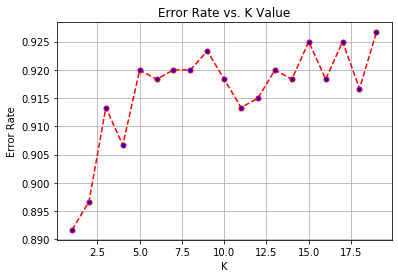

In [51]:
plt.plot(range(1,20),score,color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [52]:
knn_model= KNeighborsClassifier(n_neighbors=2)

In [53]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [54]:
y_train_pred_knn=knn_model.predict(X_train)

In [55]:
y_train_pred_knn

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [56]:
y_train_pred_knn==y_train

1194     True
45      False
1477     True
1293    False
1736     True
        ...  
1791     True
1096     True
1932     True
235      True
1061     True
Name: price_range, Length: 1400, dtype: bool

In [57]:
lss1=list(y_train==y_train_pred_knn)

In [58]:
count=0
for i in lss1:
    if i==True:
        count+=1
print(count)  

1330


In [59]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred_knn))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       365
           1       0.92      0.94      0.93       351
           2       0.93      0.92      0.93       332
           3       1.00      0.94      0.97       352

    accuracy                           0.95      1400
   macro avg       0.95      0.95      0.95      1400
weighted avg       0.95      0.95      0.95      1400



### Testing the Model With Test Data

In [60]:
y_test_pred_knn=knn_model.predict(X_test)

In [61]:
y_test_pred_knn

array([0, 0, 1, 0, 3, 1, 1, 2, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 1, 3, 3,
       1, 2, 3, 2, 1, 2, 2, 2, 2, 1, 2, 0, 3, 3, 0, 0, 0, 1, 1, 1, 2, 1,
       0, 0, 2, 2, 1, 2, 1, 2, 1, 3, 1, 3, 1, 3, 3, 1, 0, 3, 0, 3, 2, 1,
       0, 2, 3, 2, 1, 1, 0, 3, 3, 1, 1, 1, 0, 0, 0, 3, 1, 2, 3, 2, 2, 0,
       1, 1, 3, 0, 1, 1, 2, 3, 3, 0, 2, 3, 3, 2, 0, 1, 2, 0, 0, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 2, 1, 1, 0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 2,
       0, 3, 3, 0, 3, 2, 2, 1, 0, 0, 3, 1, 0, 2, 0, 0, 0, 1, 2, 3, 2, 1,
       0, 2, 1, 0, 3, 2, 3, 1, 2, 2, 3, 1, 2, 1, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 1, 2, 0, 3, 1, 0, 2, 3, 3, 0, 2, 1, 2, 2, 2, 2, 0, 1, 2, 3,
       3, 1, 3, 2, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 0, 2, 0, 1, 0, 2, 1,
       0, 1, 2, 1, 3, 3, 0, 3, 2, 1, 0, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 2,
       1, 1, 0, 1, 2, 0, 3, 3, 3, 1, 2, 1, 0, 1, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 2, 2, 2, 0, 0, 1, 2, 3, 0, 1, 1, 2, 3, 2, 2, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 1, 3, 3, 2, 2,

In [62]:
y_test_pred_knn==y_test

674      True
1699     True
1282     True
1315    False
1210    False
        ...  
1382     True
1371     True
854     False
995      True
1497     True
Name: price_range, Length: 600, dtype: bool

In [63]:
lss2=list(y_test==y_test_pred_knn)
count=0
for i in lss2:
    if i==True:
        count+=1
print(count)  

538


In [64]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred_knn))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       135
           1       0.87      0.91      0.89       149
           2       0.84      0.88      0.85       168
           3       0.98      0.83      0.90       148

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600



In [65]:
# Confusion matrix for testing data
# Confusion matrix(Actual Values, Predicted values)
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_test, y_test_pred_knn)
conf

array([[132,   3,   0,   0],
       [  9, 136,   4,   0],
       [  0,  18, 147,   3],
       [  0,   0,  25, 123]], dtype=int64)

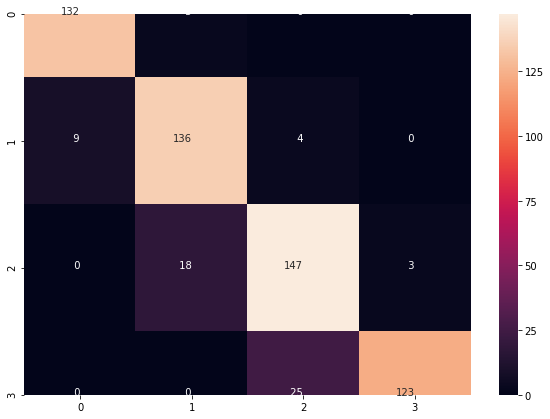

In [66]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_test, y_test_pred_knn), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred_knn)

0.8966666666666666

### Conclusion: KNN  performed the best

### Predicting the Model on a New Dataset 

#### Reading the new Unknown Csv File 

In [72]:
test_data=pd.read_csv('example_mobile.csv')

In [74]:
test_data

,Unnamed: 0,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,3.0
1,1,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,3.0
2,2,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,2.0
3,3,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,3.0
4,4,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1700,1,1.9,0,0,1,54,0.5,170,...,644,913,2121,14,8,15,1,1,0,2.0
996,996,609,0,1.8,1,0,0,13,0.9,186,...,1152,1632,1933,8,1,19,0,1,1,1.0
997,997,1185,0,1.4,0,1,1,8,0.5,80,...,477,825,1223,5,0,14,1,0,0,0.0
998,998,1533,1,0.5,1,0,0,50,0.4,171,...,38,832,2509,15,11,6,0,1,0,2.0


In [78]:
test_data=test_data.drop('Unnamed: 0',axis=1)

In [98]:
test=test_data.drop('price_range',axis=1)

In [99]:
test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [100]:
price_predicted=knn_model.predict(test)

In [103]:
price_predicted

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 2,
       1, 1, 3, 0, 2, 0, 2, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 2, 0, 3, 0, 3, 1, 1, 3, 3, 2, 0, 1, 0, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       2, 0, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 2, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 2, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 0, 0,
       2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 1, 3, 1, 0, 2, 2,
       3, 3, 1, 1, 2, 2, 3, 2, 1, 1, 0, 0, 1, 2, 0, 3, 3, 3, 0, 2, 0, 3,
       2, 2, 3, 0, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 2, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 2, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 3, 3,
       3, 2, 1, 3, 2, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

### The Values Above are the Predicted values

### Adding Predicted Values to the Data Set 

In [104]:
test_data['Predicted_price']=price_predicted

In [107]:
test_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Predicted_price
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,1412,3476,12,7,2,0,1,0,3.0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,857,3895,6,0,7,1,0,0,3.0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1366,2396,17,10,10,0,1,1,2.0,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,1752,3893,10,0,7,1,1,0,3.0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,810,1773,15,8,7,1,0,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,913,2121,14,8,15,1,1,0,2.0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1632,1933,8,1,19,0,1,1,1.0,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,825,1223,5,0,14,1,0,0,0.0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,832,2509,15,11,6,0,1,0,2.0,2
